In [63]:
import sklearn
from lazy import lazy
import gzip
import os
import csv
import string
import pandas as pd
import numpy as np
from itertools import islice
import urllib
import matplotlib.pyplot as plt
from keras.datasets import mnist
import seaborn as sns
import matplotlib
from tkinter import *
import PIL
from PIL import Image, ImageDraw, ImageFont,ImageOps
from sklearn.metrics import accuracy_score
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [64]:
def _read(filepath):
    with gzip.open(filepath, 'rt') as file_:
        reader = csv.reader(file_, delimiter='\t')
        lines = list(reader)
        return lines

In [65]:
def _parse(lines):
    lines = sorted(lines, key=lambda x: int(x[0]))
    data, target = [], []
    next_ = None
    for line in lines:
        if not next_:
            data.append([])
            target.append([])
        else:
            assert next_ == int(line[0])
        next_ = int(line[2]) if int(line[2]) > -1 else None
        pixels = np.array([int(x) for x in line[6:134]])
        data[-1].append(pixels)
        target[-1].append(line[1])
    return data, target

In [66]:
def _pad(data, target):
    max_length = max(len(x) for x in target)
    padding = np.zeros((16, 8))
    data = [x + ([padding] * (max_length - len(x))) for x in data]
    target = [x + ([''] * (max_length - len(x))) for x in target]
    return np.array(data), np.array(target)

In [68]:
URL = 'http://ai.stanford.edu/~btaskar/ocr/letter.data.gz'
path, _ = urllib.request.urlretrieve(URL)
lines = _read(path)
data, target = _parse(lines)
data1=np.array(data)
target1=np.array(target)
print(data1.shape,target1.shape)
data,target = _pad(data, target)  
print(data.shape,target.shape)
new_data =[]
new_target=[]
for i in range(0,len(data1)):
    for x in data1[i]:
        new_data.append(x) 
    for x in target1[i]:
        new_target.append(x) 
new_data=np.array(new_data)
new_target=np.array(new_target)
print(new_data.shape,new_target.shape)

(6877,) (6877,)
(6877, 14) (6877, 14)
(52152, 128) (52152,)


In [69]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [70]:
X_train, X_test, y_train, y_test = train_test_split(new_data, new_target, test_size=0.2, shuffle=False)
clf = DecisionTreeClassifier(criterion="entropy", random_state=33)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [62]:
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from scipy import interp


X, y = load_breast_cancer(return_X_y=True)

y = label_binarize(y, classes=[0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = DecisionTreeClassifier()

y_score = classifier.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#ROC curve for a specific class here for the class 2
roc_auc

{0: 0.918854928971158,
 1: 0.9188549289711581,
 2: nan,
 3: nan,
 4: nan,
 5: nan,
 6: nan,
 7: nan,
 8: nan,
 9: nan,
 10: nan,
 11: nan,
 12: nan,
 13: nan,
 14: nan,
 15: nan,
 16: nan,
 17: nan,
 18: nan,
 19: nan,
 20: nan,
 21: nan,
 22: nan,
 23: nan,
 24: nan,
 'micro': 0.9634502923976608}

In [71]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7199693222126354

[Text(468.32142857142856, 513.4, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(298.9285714285714, 453.0, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(199.28571428571428, 392.6, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(119.57142857142856, 332.2, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(79.71428571428571, 271.8, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(39.857142857142854, 211.39999999999998, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(119.57142857142856, 211.39999999999998, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(79.71428571428571, 151.0, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(159.42857142857142, 151.0, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(119.57142857142856, 90.59999999999997, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(79.71428571428571

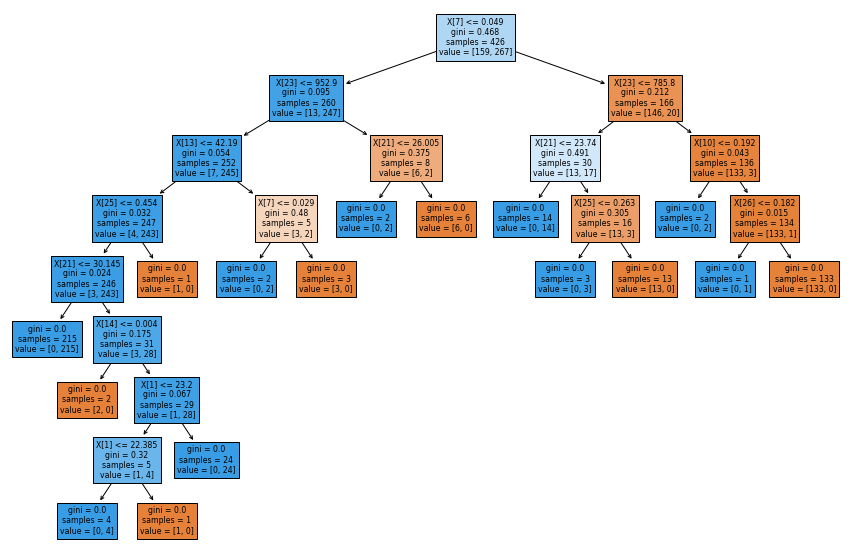

In [49]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [72]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [121]:
len(ccp_alphas)

7277

In [74]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

KeyboardInterrupt: 

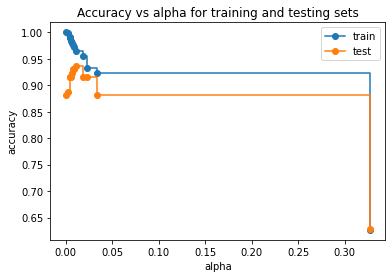

In [53]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [243]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=33, 
                             ccp_alpha=ccp_alphas[3130],
                             max_depth=50,
                             min_samples_split=8
                            )
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.00010422845918354716, criterion='entropy',
                       max_depth=50, min_samples_split=8, random_state=33)

In [244]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7240916498897517

[Text(514.0805851451563, 534.2275862068966, 'X[64] <= 0.5\nentropy = 4.306\nsamples = 41721\nvalue = [2867, 860, 1698, 880, 3681, 674, 2239, 623, 3888\n189, 817, 2275, 1416, 4345, 3432, 1283, 140, 2310\n1075, 1537, 2251, 664, 140, 413, 1033, 991]'),
 Text(314.16024113196556, 515.4827586206897, 'X[65] <= 0.5\nentropy = 4.09\nsamples = 20143\nvalue = [309, 604, 88, 775, 487, 460, 2079, 387, 3833, 184\n415, 2185, 80, 975, 353, 960, 126, 817, 985, 1162\n224, 394, 16, 396, 1021, 828]'),
 Text(217.76604055422234, 496.73793103448276, 'X[87] <= 0.5\nentropy = 3.616\nsamples = 14910\nvalue = [82, 271, 12, 616, 120, 342, 1982, 155, 3749, 183\n114, 2119, 7, 153, 84, 447, 114, 232, 913, 1034\n37, 172, 2, 304, 981, 685]'),
 Text(157.96953287079836, 477.99310344827586, 'X[78] <= 0.5\nentropy = 3.43\nsamples = 12237\nvalue = [33, 160, 12, 512, 102, 326, 1089, 122, 3730, 157\n110, 2119, 3, 65, 41, 446, 94, 230, 328, 968, 16\n114, 2, 222, 794, 442]'),
 Text(107.39904435041761, 459.24827586206897, 'X[58

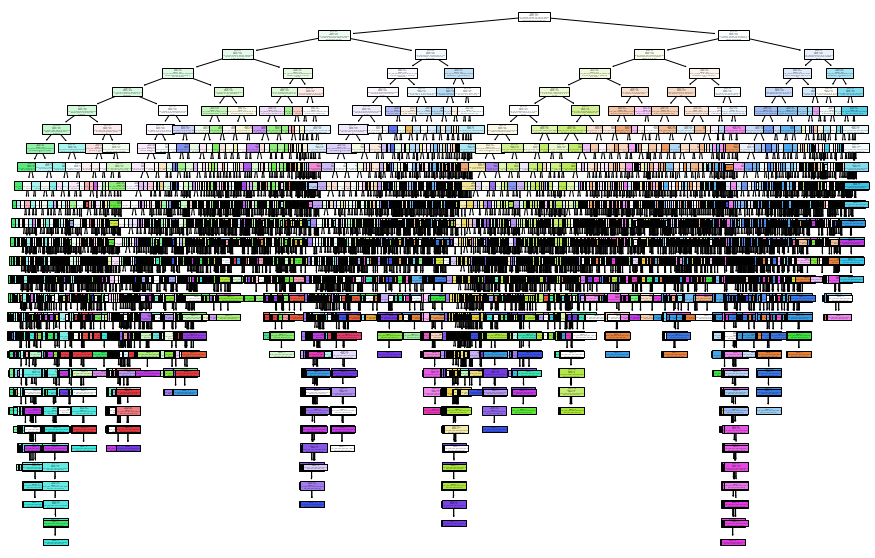

In [245]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [ ]:
#bỏ
new_data= data.reshape(6877*14,128)
y=target.reshape(6877*14,)
new_target=[]
index=[]
t=0
for i in range(0,96278):
    let = y[i] if any(y[i]) else '_'
    new_target.append(let)
    if let=='_' :
        index.append(i)

new_target =np.array(new_target)

for n in index:
    k=n-t
    print(k)
    new_data=np.delete(new_data, (k), axis=0)
    new_target=np.delete(new_target, (k), axis=0) 
    t=t+1 
    